# Visualización de datos

En este notebook se visualizarán los datos con los que se entrena la red en caso de buscar algún dato en particular del dataset.

In [4]:
import numpy as np
import urllib.request, json 
x=0
dataset = []
data_for_visual = np.zeros(750,dtype=object)

def help_the_norman(df,leng):
  a = df
  min_i = 0
  min_j = 0
  for i in range(150-leng,150):
    j = 10
    if df[i,j] < 1e-6:
      min_i = i
    if df[i,j+20] < 1e-6:
      min_j = i
 
  if min_j+1 > len(df)-1:
    min_j = 0
  if min_i+1 > len(df)-1:
    min_i = 0

  for i in range(int(min_i+1)):
    for j in range(22):
      a[i,j] = df[min_i+1,j]
      a[i,j+42] = df[min_i+1,j+42]

  for i in range(int(min_j+1)):
    for j in range(22,42):
      a[i,j] = df[min_j+1,j]
      a[i,j+42] = df[min_j+1,j+42]

  return a

def norman(df):
  a = df
  min_x = df[0][0][0]
  max_x = df[0][0][0]
  min_y = df[0][0][1]
  max_y = df[0][0][1]
  for i in range(len(df)):
    for j in range(len(df[i])):
      if df[i][j][0] < min_x:
        min_x = df[i][j][0]
      if df[i][j][0] > max_x:
        max_x = df[i][j][0]
      if df[i][j][1] < min_y:
        min_y = df[i][j][1]
      if df[i][j][1] > max_y:
        max_y = df[i][j][1]

  for i in range(len(df)):
    for j in range(len(df[i])):
      b = (max_x-min_x)
      c = (max_y-min_y)
      if b > 1e-6:
        a[i][j][0] = (df[i][j][0]-min_x)/b
        a[i][j][1] = (df[i][j][1]-min_y)/c
      else:
        a[i][j][0] = 0
        a[i][j][1] = 0
  return a

for user in range(1,11): #1,11
  u = '00'+str(user)
      
  if user>9:
      u = '0'+str(user)

  for label in range(1,16): #1,16
      
      l = '00'+str(label)
      
      if label>9:
          l = '0'+str(label)
          
      for sample in range(1,6): #1,6
          s = '00'+str(sample)
          
          url = 'https://raw.githubusercontent.com/agustring/LSA_classifier/main/preproc%20data2/{}_{}_{}_pre.json?token=ARECJQ4LDX673DAOGWXLV5TBSKZ5W'.format(u, l, s)
          
          with urllib.request.urlopen(url) as url2:
              df = json.loads(url2.read().decode())
          df = norman(df)
          data_struct = np.array([[0 for i in range(2*42)] for j in range(150)], dtype=float)
          for i in range(len(df)):
              p=0
              for j in range(0,42,1):
                  data_struct[i+(150-len(df)),j] = df[i][p][0]
                  data_struct[i+(150-len(df)),j+42] = df[i][p][1]
                  p+=1
          dataset.append(help_the_norman(data_struct,len(df)))
          x+=1
            
dataset = np.array(dataset)

Visualiza los datos para una repetición en particular de una seña para todas las personas.

La posicion es nula hasta el frame:  0
La posicion es nula hasta el frame:  0
La posicion es nula hasta el frame:  0
La posicion es nula hasta el frame:  0
La posicion es nula hasta el frame:  0
La posicion es nula hasta el frame:  0
La posicion es nula hasta el frame:  0
La posicion es nula hasta el frame:  0
La posicion es nula hasta el frame:  0
La posicion es nula hasta el frame:  0


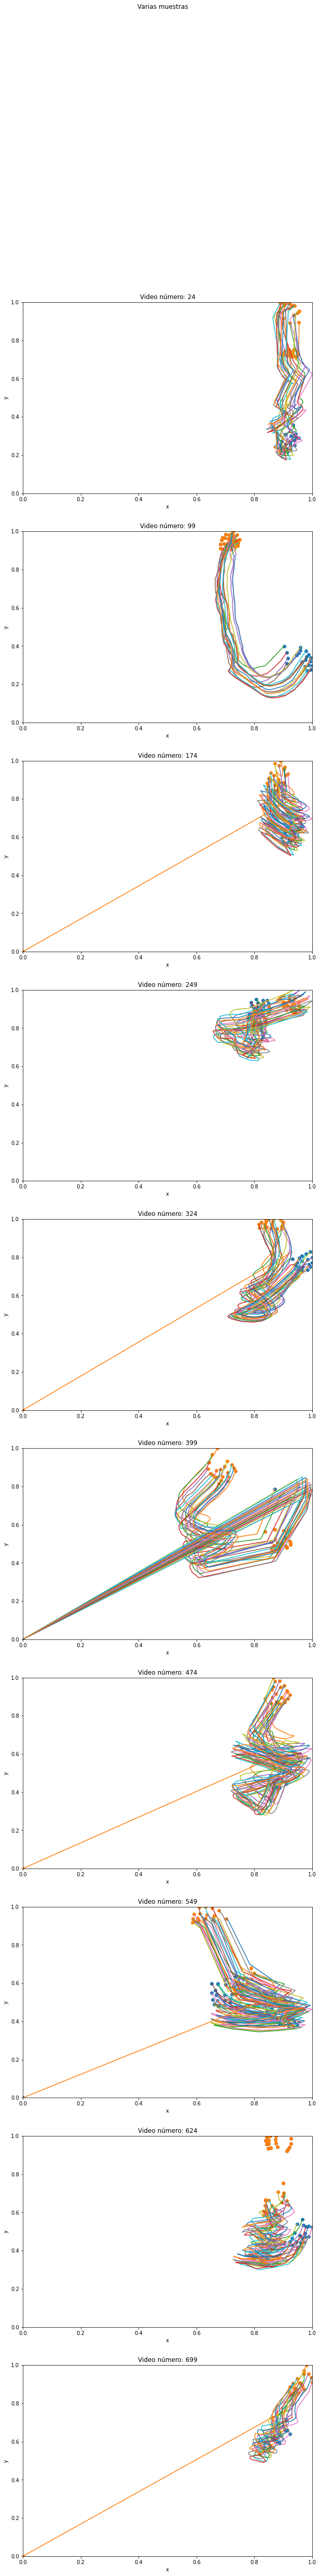

In [21]:
import matplotlib.pyplot as plt

def visual_data(sign, rep): #sign [0,4] ; rep [0,4]
  lmrk = 42
  v = 75*0+sign*5+rep
  analand = 4
  fase = 0

  fig, axs = plt.subplots(10)
  fig.set_size_inches(10,8*10)
  fig.suptitle('Varias muestras')

  for video_num in range(10):
    vid = 75*video_num+v
    print("La posicion es nula hasta el frame: ",fase)
    axs[video_num].set_title("Video número: "+str(vid))
    x = np.zeros(lmrk)
    y = np.zeros(lmrk)
    x2 = np.zeros(len(dataset[vid])-fase)
    y2 = np.zeros(len(dataset[vid])-fase)
    axs[video_num].set_xlabel('x')
    axs[video_num].set_ylabel('y')
    axs[video_num].axis(xmin=0,xmax=1,ymin=0,ymax=1)
    for i in range(lmrk):
      x[i] = dataset[vid][fase][i]
      y[i] = dataset[vid][fase][i+42]
    axs[video_num].scatter(x,y)
    
    for i in range(lmrk):
      for j in range(fase,len(dataset[video_num+v])):
        x2[j-fase] = dataset[vid][j][i]
        y2[j-fase] = dataset[vid][j][i+42]
      axs[video_num].plot(x2,y2)

    for i in range(lmrk):
      x[i] = dataset[vid][len(dataset[vid])-1][i]
      y[i] = dataset[vid][len(dataset[vid])-1][i+42]
    axs[video_num].scatter(x,y)

  fig.show()

visual_data(4, 4)